In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in the data
cifar100 = tf.keras.datasets.cifar100

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


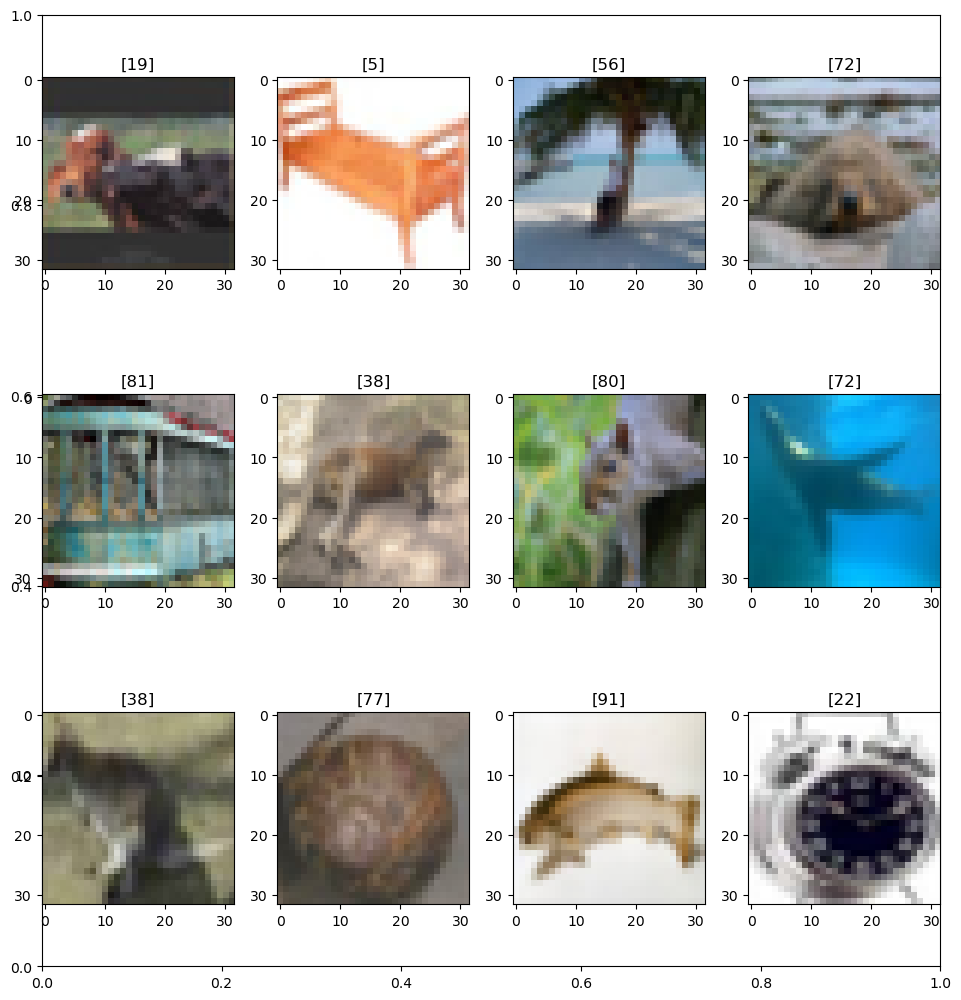

In [3]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


show_samples(x_train, y_train)

In [4]:
y_train = tf.one_hot(y_train,
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [5]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),


    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,579,844 (32.73 MB)

 Trainable params: 8,578,820 (32.73 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [7]:
#Model fitting

In [8]:
hist = model.fit(x_train, y_train,
                 epochs=8,
                 batch_size=64,
                 verbose=1,
                 validation_data=(x_val, y_val))

Epoch 1/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 200ms/step - AUC: 0.7111 - accuracy: 0.0752 - loss: 4.2785 - val_AUC: 0.7691 - val_accuracy: 0.0904 - val_loss: 4.1158
Epoch 2/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 204ms/step - AUC: 0.8291 - accuracy: 0.1441 - loss: 3.6400 - val_AUC: 0.8718 - val_accuracy: 0.2210 - val_loss: 3.2515
Epoch 3/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 199ms/step - AUC: 0.8809 - accuracy: 0.2262 - loss: 3.1574 - val_AUC: 0.8888 - val_accuracy: 0.2520 - val_loss: 3.0413
Epoch 4/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - AUC: 0.8974 - accuracy: 0.2663 - loss: 2.9659 - val_AUC: 0.8895 - val_accuracy: 0.2646 - val_loss: 3.0113
Epoch 5/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - AUC: 0.9139 - accuracy: 0.3034 - loss: 2.7533 - val_AUC: 0.9114 - val_accuracy: 0.3229 - val_loss: 2.7145
Epoch 6/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - AUC: 0.9293 - accuracy: 0.3558 - loss: 2.5017 - val_AUC: 0.9025 - val_accuracy: 0.3159 - val_loss: 2.8232
Epoch 7/8
782/782 ━━━━

In [24]:
#Now we will use the convolution layers of this model to build our CIFAR10 classifier.
temp = model.get_layer('conv2d_3')
last_output = temp.output
last_output.shape

(None, 16, 16, 128)

In [25]:
# Now create the transfer learning model properly
def create_transfer_model(base_model):
    # Create a new functional API model using the base model's layers
    inputs = layers.Input(shape=(32, 32, 3))
    
    # Get the output from conv4 layer (the last conv layer)
    x = base_model.layers[0](inputs)  # conv1
    x = base_model.layers[1](x)       # conv2
    x = base_model.layers[2](x)       # conv3
    x = base_model.layers[3](x)       # pool1
    conv4_output = base_model.layers[4](x)  # conv4
    
    # Freeze the convolutional layers
    for layer in base_model.layers[:5]:
        layer.trainable = False
    
    # Add new classification head
    x = layers.Flatten()(conv4_output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    transfer_model = models.Model(inputs=inputs, outputs=outputs)
    
    transfer_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return transfer_model

In [26]:
# Create the transfer model
transfer_model = create_transfer_model(model)
transfer_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,293,674 (16.38 MB)

 Trainable params: 4,195,978 (16.01 MB)

 Non-trainable params: 97,696 (381.62 KB)

In [27]:
#compile the model with the same loss, optimizer, and metrics used in the CIFAR100 classifier
transfer_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [28]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [29]:
y_train = tf.one_hot(y_train, depth=10,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val, depth=10,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [30]:
#prepared a new model which is now ready to be trained on the CIFAR10 dataset

In [31]:
history = transfer_model.fit(x_train, y_train,
                        batch_size=64,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_val, y_val))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 80ms/step - AUC: 0.8964 - accuracy: 0.5454 - loss: 1.3386 - val_AUC: 0.9474 - val_accuracy: 0.6655 - val_loss: 0.9599
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - AUC: 0.9561 - accuracy: 0.6990 - loss: 0.8801 - val_AUC: 0.9508 - val_accuracy: 0.6809 - val_loss: 0.9221
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - AUC: 0.9649 - accuracy: 0.7308 - loss: 0.7816 - val_AUC: 0.9496 - val_accuracy: 0.6744 - val_loss: 0.9327
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - AUC: 0.9717 - accuracy: 0.7547 - loss: 0.7013 - val_AUC: 0.9509 - val_accuracy: 0.6931 - val_loss: 0.9261
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - AUC: 0.9761 - accuracy: 0.7774 - loss: 0.6392 - val_AUC: 0.9497 - val_accuracy: 0.6821 - val_loss: 0.9415
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - AUC: 0.9796 - accuracy: 0.7920 - loss: 0.5895 - val_AUC: 0.9481 - val_accuracy: 0.6871 - val_loss: 0.9626
Epoch 7/20
782/782 ━━━━━━━━━

In [32]:
# Evaluate on CIFAR-10 test set
score = transfer_model.evaluate(x_val, y_val, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 1.5287829637527466
Test accuracy: 0.9269559979438782


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


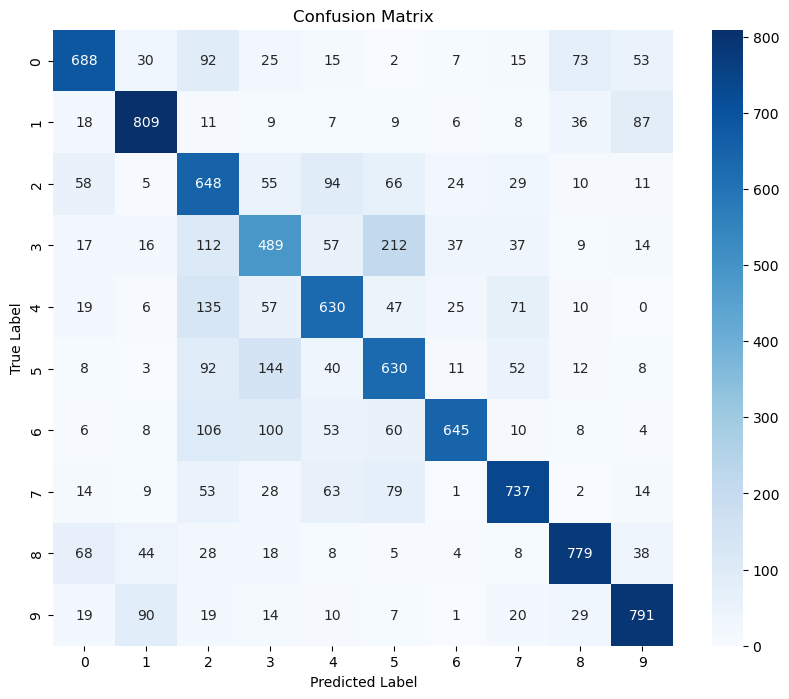

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = transfer_model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()